In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd  # Conexión con excel.
import numpy as np  # Funciones matemáticas.
import matplotlib.pyplot as plt  # Para gráficas.
import seaborn as sns  # Para graficar distribuciones estadísticas.

from sklearn.neighbors import KNeighborsClassifier  # KNN.
from sklearn.metrics import confusion_matrix  # Matriz de confusión.
from sklearn.cluster import KMeans  # Montoncitos de datos.

In [ ]:
nxl = "/content/drive/MyDrive/Universidad :)/Semestre 3/Analítica de Negocios/heart_statlog_cleveland_hungary_final.xlsx"
datos = pd.read_excel(nxl, sheet_name = 0)
datos = datos.dropna()
datos.head(30)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


<Figure size 1000x1000 with 0 Axes>

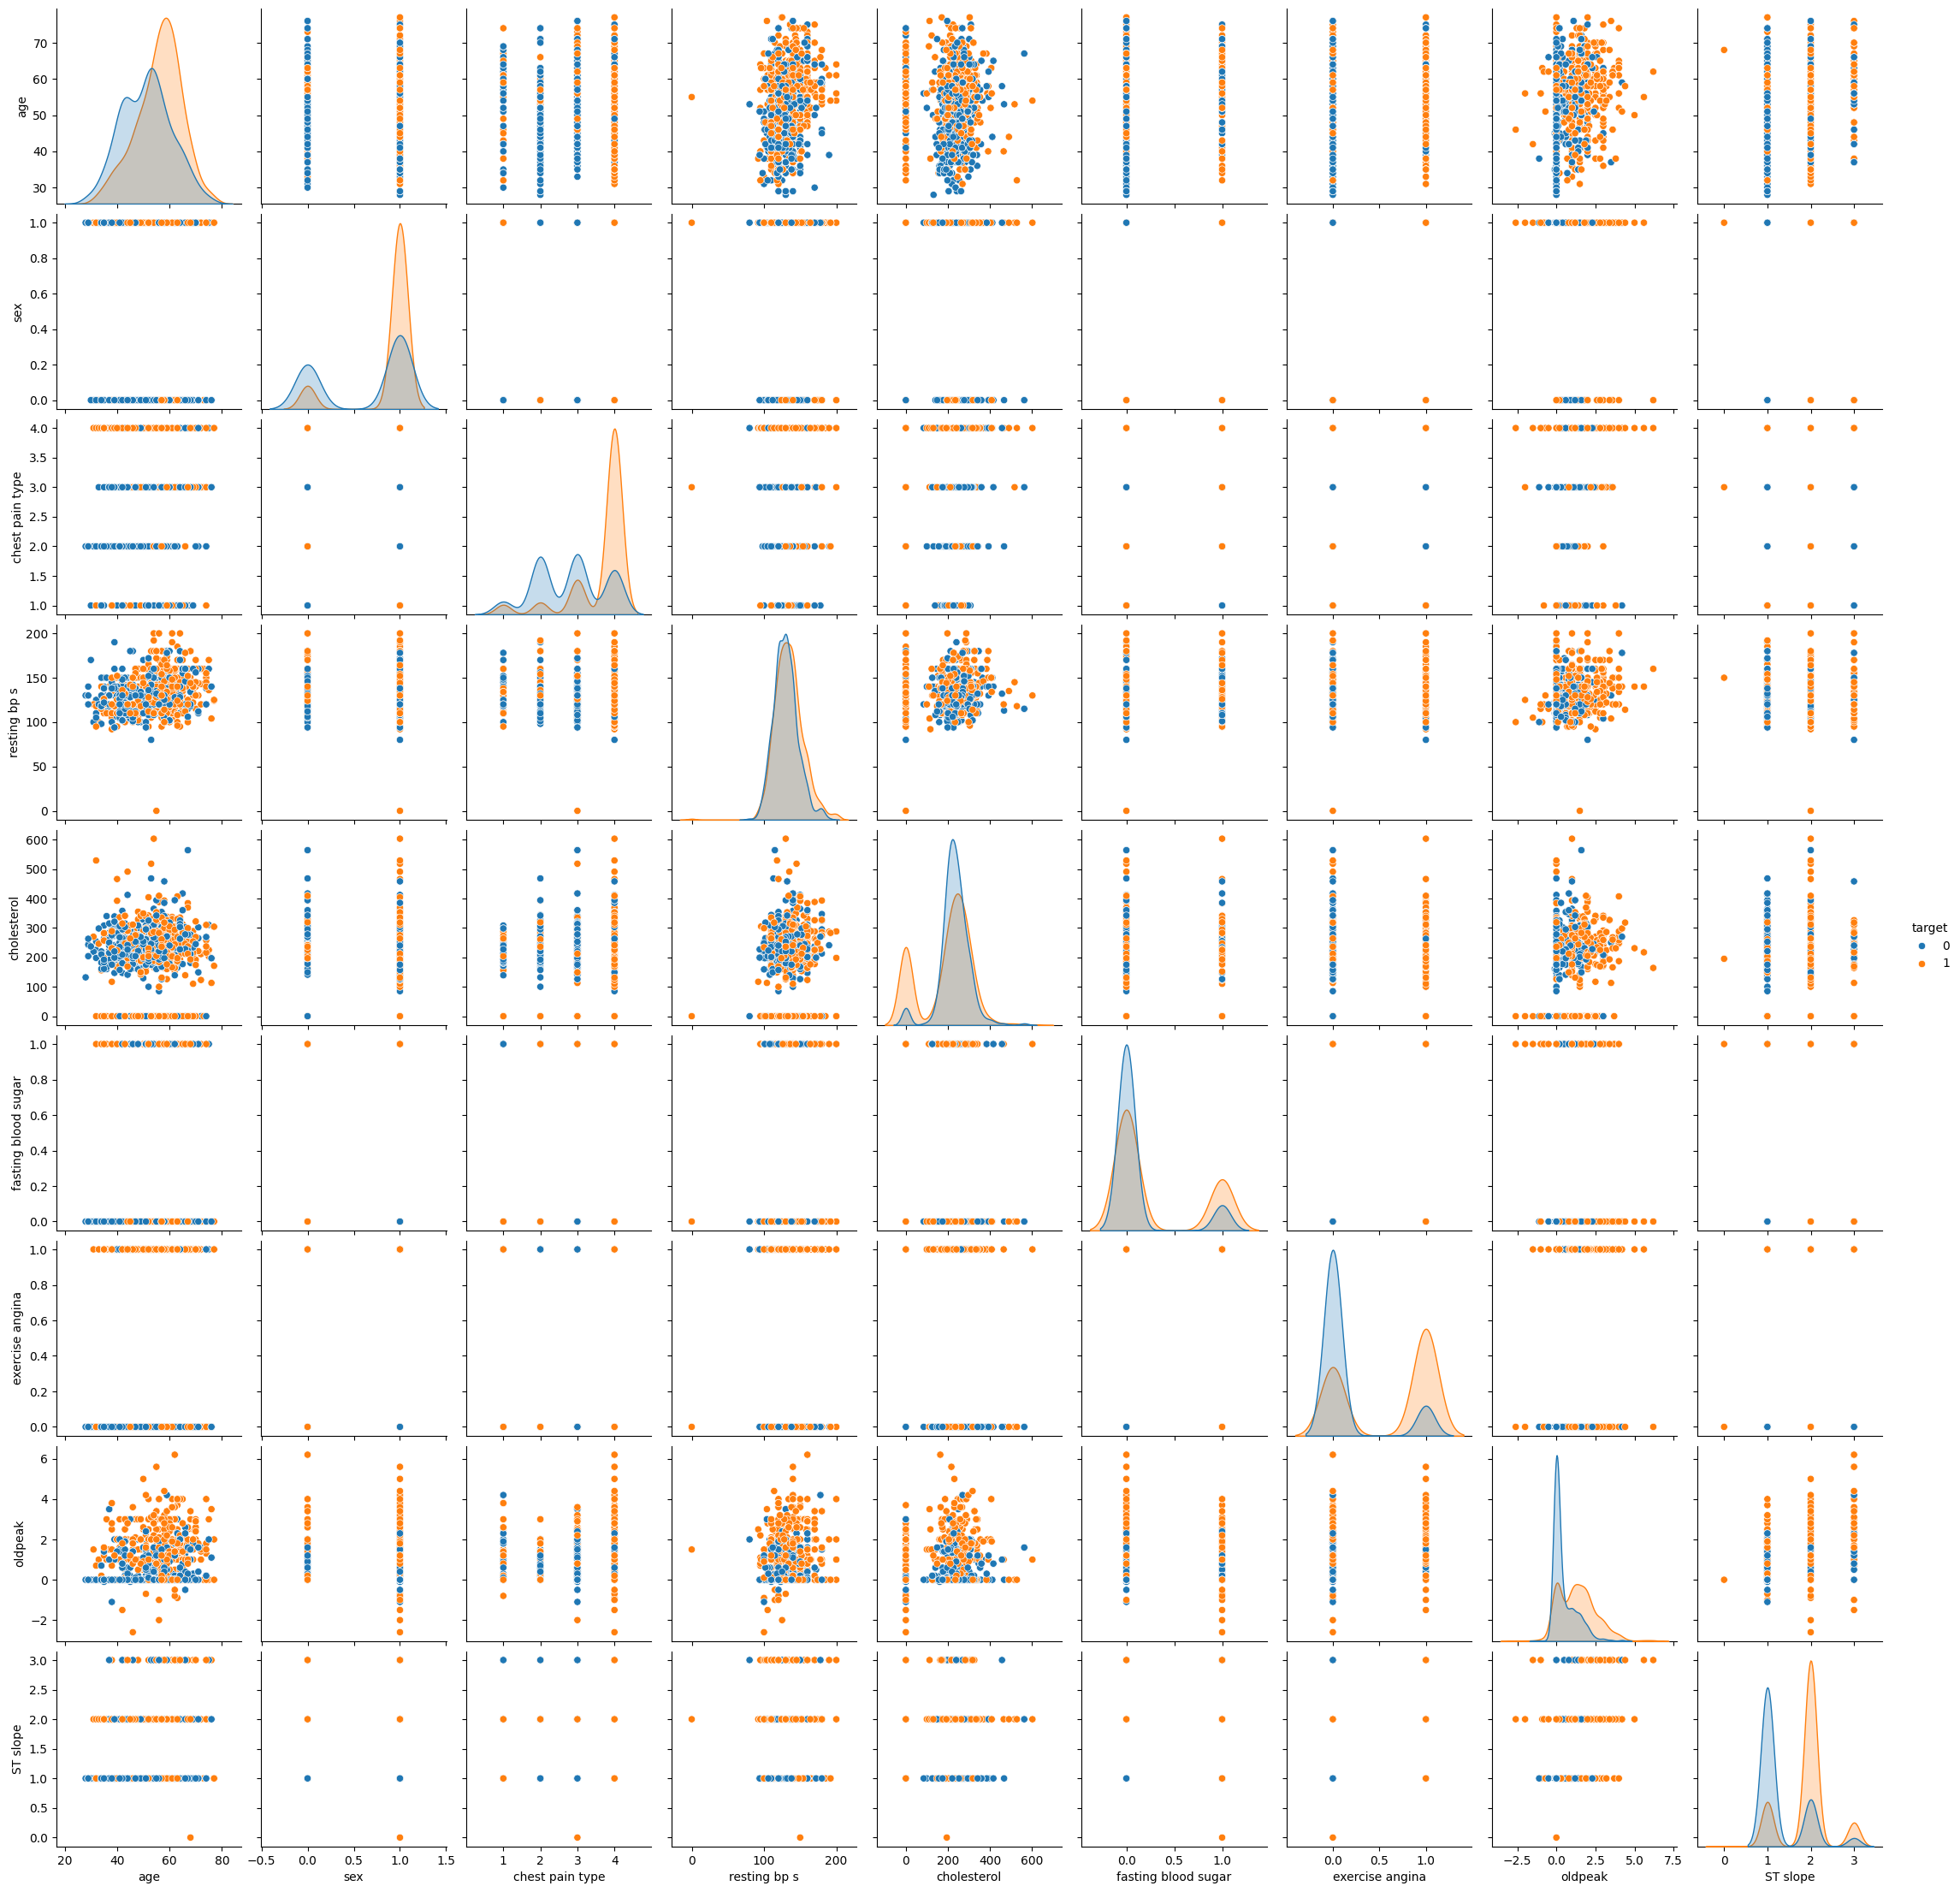

<Axes: >

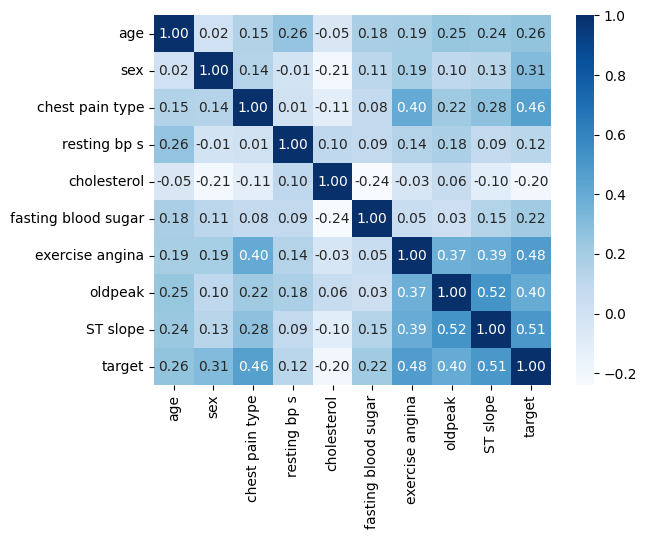

In [ ]:
datos = datos[["age",	"sex", 	"chest pain type",	"resting bp s",	"cholesterol",	"fasting blood sugar", "exercise angina",	"oldpeak", 	"ST slope", "target"]]
# 1. Determinar la correlación entre las variables y su impacto sobre la variable salida.
plt.figure(figsize = (10,10))
sns.pairplot(datos, hue = "target")
plt.show()

# 2. La correlación numérica es:

corr= datos.corr()
sns.heatmap(corr, cmap ="Blues", annot=True, fmt= ".2f")

#**Modelo KNN**

In [ ]:
XD=np.array(datos[["age",	"sex", 	"chest pain type",	"resting bp s",	"cholesterol",	"fasting blood sugar", "exercise angina",	"oldpeak", 	"ST slope"]])
yd=np.array(datos["target"])

#Modelo KNN
mknn = KNeighborsClassifier(n_neighbors=10)
mknn.fit(XD,yd)

#Evaluar el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusión
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusión: \n", cm)

VN = cm[0,0]; FP = cm[0,1]; FN = cm[1,0]; VP = cm[1,1]

Ex = (VP + VN)/(len(XD))
print("La Exactitud del Modelo es: ", Ex)

Sen = VP/(VP + FN)
print("La Sensibilidad del Modelo es: ", Sen)

Esp = VN/(VN + FP)
print("La Especificidad del Modelo es: ", Esp)

Esta es la matriz de confusión: 
 [[424 137]
 [172 457]]
La Exactitud del Modelo es:  0.7403361344537815
La Sensibilidad del Modelo es:  0.7265500794912559
La Especificidad del Modelo es:  0.7557932263814616


In [ ]:
#Evaluamos un pacienta al azar del excel.
XDP=np.array([[35, 1, 3, 123, 161, 0, 0, -0.1, 1]])
ydpp=mknn.predict(XDP)
print("Tiene enfermedad cardiaca: ", ydpp)

#Evaluamos un pacienta al azar.
XDP2=np.array([[19, 0, 2, 125, 220, 0, 1, 1.1, 1 ]])
ydpp2=mknn.predict(XDP2)
print("Tiene enfermedad cardiaca: ", ydpp2)

Tiene enfermedad cardiaca:  [0]
Tiene enfermedad cardiaca:  [0]


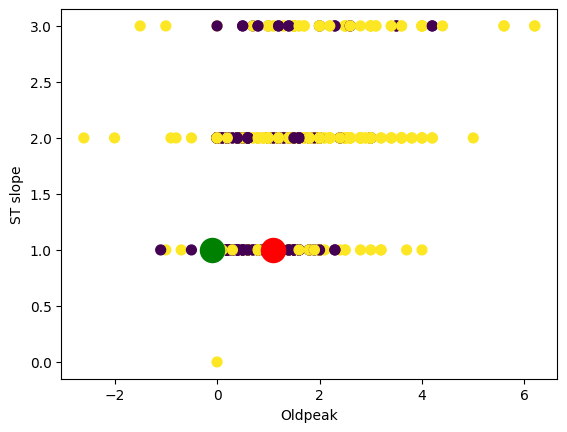

In [ ]:
#Graficas siempre se hacen con las variables que tienen más correlación
plt.scatter(XD[:, 7],XD[:, 8], c=yd, s=50, cmap="viridis")
plt.scatter(XDP[:,7],XDP[:,8], marker= "o", s=300, facecolors="green")
plt.scatter(XDP2[:,7],XDP[:,8], marker= "o", s=300, facecolors="red")
plt.xlabel("Oldpeak")
plt.ylabel("ST slope")
plt.show()

#**Modelo K-Means**

Los labels son:
 [3 1 3 ... 1 4 1]
Los conteos son:
 [173 293  25 278 421]
La matriz de confusión es:
 [[ 21 179  11 121 229]
 [152 114  14 157 192]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
Exactitud:  0.28969957081545067
Sensibilidad:  0.42857142857142855
Especificidad:  0.105
Los centroides son los siguientes:
 [[5.62369942e+01 9.36416185e-01 3.63583815e+00 1.29624277e+02
  4.91329480e-01 5.14450867e-01 4.85549133e-01 8.20809249e-01
  1.84393064e+00]
 [5.18156997e+01 7.57679181e-01 3.08873720e+00 1.30737201e+02
  1.87310580e+02 1.53583618e-01 3.10580205e-01 8.21501706e-01
  1.51194539e+00]
 [5.56000000e+01 4.40000000e-01 3.56000000e+00 1.38840000e+02
  4.42680000e+02 2.80000000e-01 3.20000000e-01 1.17200000e+00
  1.80000000e+00]
 [5.46870504e+01 6.94244604e-01 3.20503597e+00 1.38017986e+02
  2.99661871e+02 1.76258993e-01 4.56834532e-01 1.02697842e+00
  1.62230216e+00]
 [5.32612827e+01 7.62470309e-01 3.16627078e+00 1.29909739e+02
  2.39888361e+02 1.5201900

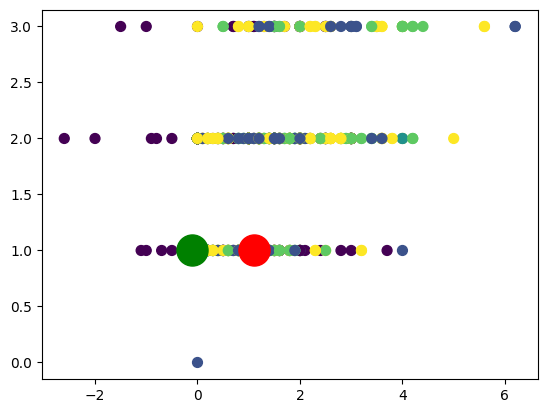

La predicción es: [1]
La predicción es: [4]


In [ ]:
# K-Means(Montoncitos de datos - Clusters)
np.random.seed(42)
mkm=KMeans(n_clusters=5,init= "random", random_state= 42)
mkm.fit(XD, yd)
labels=mkm.labels_
print("Los labels son:\n", labels)

counts_1 = np.bincount(labels)
print("Los conteos son:\n", counts_1)

ydp = mkm.predict(XD)
cm = confusion_matrix(yd, ydp)
print("La matriz de confusión es:\n", cm)
VN = cm[0,0]; FP = cm[0,1]; FN = cm[1,0]; VP = cm[1,1]

Ex = (VP + VN)/(VP + VN + FP + FN)
Sen = VP/(VP + FN); Esp = VN/(VN + FP)

print("Exactitud: ", Ex)
print("Sensibilidad: ", Sen)
print("Especificidad: ", Esp)

centroids = mkm.cluster_centers_
print("Los centroides son los siguientes:\n", centroids)

plt.figure()
plt.scatter(XD[:,7],XD[:,8], c = mkm.labels_, s = 50, cmap = "viridis") # Permite agrupar los datos por color.
plt.scatter(XDP[:,7],XDP[:,8], marker = "o", s = 500, facecolors = "green")
plt.scatter(XDP2[:,7],XDP[:,8], marker = "o", s = 500, facecolors = "red")

 # Graficar al paciente o pacienta.
plt.show()
ydpkm =mkm.predict(XDP)
ydpkm2 =mkm.predict(XDP2)
print("La predicción es:", ydpkm)
print("La predicción es:", ydpkm2)

In [ ]:
def prueba(X,y):
  r = len(np.where((labels == X) & (yd == y))[0])

  if y == 0:
    return(f"Las personas del cluster {X} normales son: {r} = {r/counts_1[X]:.4f}")
  else:
    return(f"Las personas del cluster {X} con problemas cardiacos son: {r} = {r/counts_1[X]:.4f}")

print(prueba(0,0))
print(prueba(0,1))
print(prueba(1,0))
print(prueba(1,1))
print(prueba(2,0))
print(prueba(2,1))
print(prueba(3,0))
print(prueba(3,1))
print(prueba(4,0))
print(prueba(4,1))
print("El total de los datos es: ", len(datos))

Las personas del cluster 0 normales son: 21 = 0.1214
Las personas del cluster 0 con problemas cardiacos son: 152 = 0.8786
Las personas del cluster 1 normales son: 179 = 0.6109
Las personas del cluster 1 con problemas cardiacos son: 114 = 0.3891
Las personas del cluster 2 normales son: 11 = 0.4400
Las personas del cluster 2 con problemas cardiacos son: 14 = 0.5600
Las personas del cluster 3 normales son: 121 = 0.4353
Las personas del cluster 3 con problemas cardiacos son: 157 = 0.5647
Las personas del cluster 4 normales son: 229 = 0.5439
Las personas del cluster 4 con problemas cardiacos son: 192 = 0.4561
El total de los datos es:  1190


# Análisis de resultados.

En la base de datos se puede observar un total de 1190 personas y se utiliza el  método de clústerización KNN (Key Nearest Neighbor) y K - Means con las variables age (expresada en años), sex (clasificando en masculino = 1 y femenimo = 0), chest pain type (clasificando a las personas de acuerdo al tipo de angina que tienen, la cual es un tipo de dolor en el pecho causado por la reducción del flujo sanguíneo al corazón o una parte del músculo del corazón no se está recibiendo suficiente sangre rica en oxígeno, si es una angina típica = 1, una angina atípica = 2, un dolor no anginoso = 3 o es asintomático = 4), resting bp s (la cual es la presión arterial sistólica en reposo, es decir, la fuerza que ejerce la sangre en los vasos sanguíneos al contraerse el corazón durante el reposo, siendo lo normal de 120 a 129mmHg en adultos), cholesterol (expresada en mm/dl), fasting blood sugar (la cual ayuda a saber cómo está el cuerpo regulando el azúcar en la sangre y se está clasificando a las personas si es menor = 0 o mayor = 1 a 120mg/dl), exercise angina (si la persona tiene dolor en el pecho al hacer ejercicio), oldpeak (El segmento ST muestra cuando se contrae el ventrículo pero no hay electricidad fluyendo a través de él, cuando está en depresión es porque se encuentra más bajo de lo normal y esta varible muestra el punto más bajo del ST en depresión), ST slope (que es el tipo de pendiente que presenta el segmento ST, donde 1 = ascendente, 2 = recto y 3 = descendente) y target (resultado, con 0 indicando que no tiene la enfermedad y 1 que sí la tiene). Según el gráfico de Scatter y el mapa de calor podemos ver que las variables que tienen más correlación es el Oldpeak con el ST slope, siendo una relación directa (+) del 52%. La variable que tiene mayor influencia sobre la enfermedad es el ST slope con un 51% de correlación. El modelo KNN acertó en un 74.03% al clasificar los datos. En la sensibilidad le acertó en un 72.66% y en la especificidad le da 75.58% por ende el modelo niega de mejor manera. Las personas tienen una mayor probabilidad de no desarrollar una enfermedad cardiaca.

Podemos observar que el método K - Means acertó en un 28.97% al clasificar los datos, demostrando que no es muy confiable. En la sensibilidad le acertó en un 42.85% y en la especificidad le da 10.50% por ende el modelo aprueba de mejor manera. En la gráfica podemos observar que un hombre de 35 años, que tiene una angina en el pecho típica, tiene una presión arterial de 123mmHg, un colesterol de 161mg/dl, una glucemia en ayunas menor a 120mg/dl, no presenta dolor en el pecho al hacer ejercicio, tiene el oldpeak en -0.1mm y tiene una inclinación del ST clasificada como pendiente ascendente (lo cual significa que está normal), para esta persona el modelo arrojó que es normal, es decir que no tiene una enfermedad cardíaca. También, se puede observar una segunda persona en la gráfica, una mujer de 19 años, que tiene una angina en el pecho atípica, tiene una presión arterial de 125mmHg, un colesterol de 220mg/dl, una glucemia en ayunas menor a 120mg/dl, no presenta dolor en el pecho al hacer ejercicio, tiene el oldpeak en 1.1mm y tiene una inclinación del ST clasificada con pendiente ascendente (lo cual significa que está normal), para esta persona el modelo arrojó que es normal, es decir que no tiene una enfermedad cardíaca.

Finalmente, se crearon 5 clústers donde el clúster 0 tiene 152 de 173 personas (un 87.9%) que tienen enfermedades cardiacas, en el clúster 1 hay 179 de 293 (un 61.1%) que no tienen problemas cardiácos, en el clúster 2 hay 14 de 25 personas (un 56%) que tienen problemas cardiacos, el clúster 3 tiene 157 de 278 personas (un 56.5%) que tienen problemas cardiacos y en el clúster 4 hay 229 de 421 personas (un 54.4%) que no tienen problemas cardiacos.
